In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import tikzplotlib
import numpy as np 
from pathlib import Path

import geopandas as gpd
import numpy as np
from shapely import box
from shapely import contains
from shapely import disjoint
from shapely import points

import pherosensor
#from pheromone_dispersion.geom import MeshRect2D
from utils.plot_colormap import plot_colormap, plot_colormap_all_timestep

import sys
import os
os.chdir('../')
path_FAW_case = os.getcwd()
from gen_geom import geom

In [2]:
path_output_FAW_case = path_FAW_case + '/output_direct_model'

In [3]:
msh = geom()
xv, yv = np.meshgrid(msh.x, msh.y, sparse=True, indexing="ij")

In [4]:
c_save = np.load(Path(path_output_FAW_case) / f'c_save.npy')
t_save = np.load(Path(path_output_FAW_case) / f't_save.npy')

In [5]:
path_data_FAW_case = path_FAW_case + '/data'
S_value = np.load(Path(path_data_FAW_case) / 'S.npy')[0,:,:]

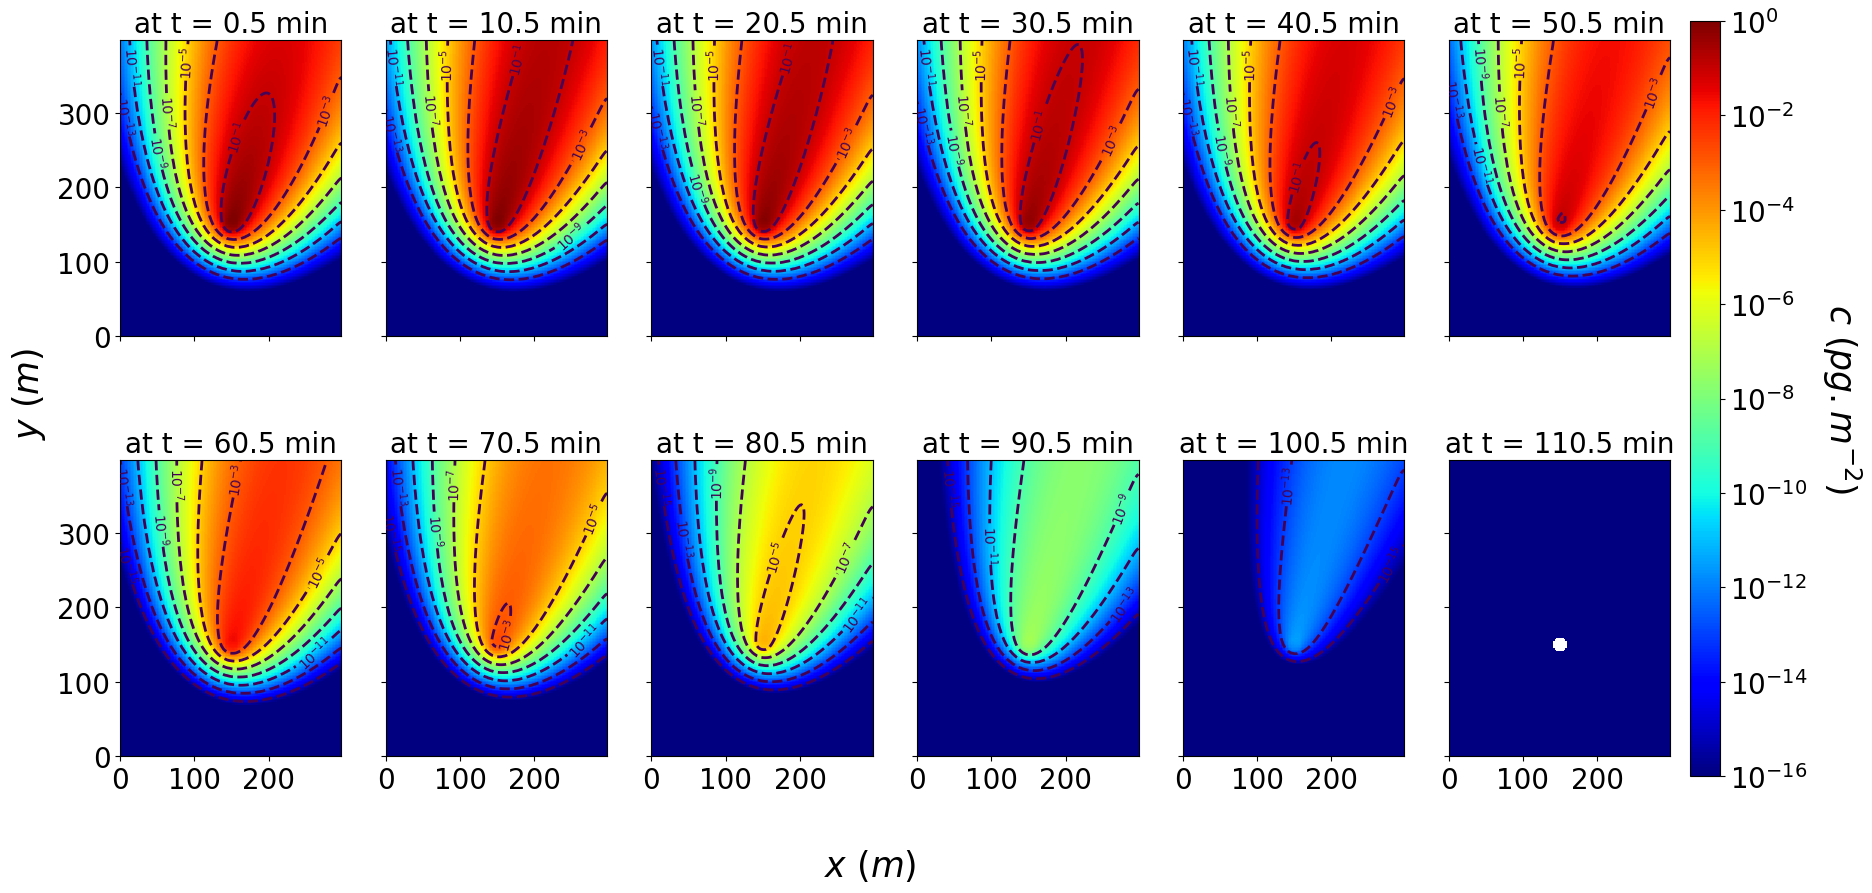

In [8]:
nb_fig = 12
n_col = 6
n_ligne = 2
fontsize=25
fig, axs = plt.subplots(n_ligne,n_col,figsize=(20,10), sharex=True, sharey=True)
vmin = np.min(c_save)
vmax = np.max(c_save)
lmax = 1
lmin = 10**(-16)
for i in range(nb_fig): 
    l = i//n_col
    c = i%n_col
    title = f'at t = {"{:.2f}".format(t_save[i]/60)} min'
    fmt = ticker.LogFormatterMathtext()
    fmt.create_dummy_axis()
    title = f'at t = {"{:.1f}".format(t_save[i]/60)} min'
    c_plot = c_save[i,:,:]
    if i <6:
        levels = [10**(i) for i in [-13,-11,-9,-7,-5,-3,-1,1]]
        contour = axs[l,c].contour(msh.x-np.min(msh.x), msh.y-np.min(msh.y), c_plot, linestyles='dashed', levels=levels, linewidths=2)
        axs[l,c].clabel(contour, inline=True, fontsize=10, fmt=fmt)
    elif 6 <= i < nb_fig - 1:#*1e12
        levels = [10**(i) for i in [-15,-13,-11,-9,-7,-5,-3,1]]
        contour = axs[l,c].contour(msh.x-np.min(msh.x), msh.y-np.min(msh.y), c_plot, linestyles='dashed', levels=levels, linewidths=2)
        axs[l,c].clabel(contour, inline=True, fontsize=10, fmt=fmt)
    elif i == nb_fig - 1: 
        c_plot[S_value>1.e-13] = np.nan    
    pcmesh = axs[l,c].pcolormesh(xv[:, 0]-np.min(msh.x), yv[0, :]-np.min(msh.y), c_plot, cmap='jet',norm=colors.LogNorm(vmin=lmin, vmax=lmax))  # , norm=norm)
    axs[l,c].set_aspect('equal', adjustable='box')
    axs[l,c].set_title(title, fontsize=fontsize - 5)
    axs[l,c].set_xticks([0,100,200,300])
    axs[l,c].set_yticks([0,100,200,300])
    axs[l,c].tick_params(labelsize=fontsize - 5)
    axs[l,c].set_xlim(0.,np.max(msh.x)-np.min(msh.x))
    axs[l,c].set_ylim(0.,np.max(msh.y)-np.min(msh.y))
fig.supxlabel('$x$ ($m$)', fontsize=fontsize)
fig.supylabel('$y$ ($m$)', fontsize=fontsize, x=0.07, y=0.5)
cbar_ax = fig.add_axes([0.91, 0.117, 0.015, 0.755])
cbar = fig.colorbar(pcmesh, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize - 5)
cbar.set_label('$c$ ($pg.m^{-2}$)', rotation=270, fontsize=fontsize, labelpad=40)
plt.show()


#path = 'TO BE DEFINED'
#file_name = 'c_target'
#plt.savefig(Path(path) / f"{file_name}.png", format='png', bbox_inches="tight")
